#Importing required libraries

In [ ]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computing
import warnings  # Handle warnings
import matplotlib.pyplot as plt  # Basic plotting
import plotly.express as px  # Interactive plotting
import seaborn as sns  # Statistical data visualization

# Import machine learning related modules
from sklearn.model_selection import train_test_split  # Split data into training and testing sets
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.ensemble import RandomForestRegressor  # Random Forest regression
from sklearn.tree import DecisionTreeRegressor  # Decision Tree regression
from sklearn.neighbors import KNeighborsRegressor  # K-Nearest Neighbors regression
import lightgbm as lgb  # Light Gradient Boosting Machine
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting regression
from sklearn import metrics  # Model evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score  # Specific metrics for regression

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
## Import Google Colab drive mounting utility
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Loading the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/diamonds.csv') #Read the diamond dataset from Google Drive
data.head() ## Display first few rows of the dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
description = pd.read_excel('/content/drive/MyDrive/Data Dictionary.xlsx') #Read the description sheet about the data from Google Drive
description

,Variable Name,Description
0,Carat,Carat weight of the cubic zirconia.
1,Cut,Describe the cut quality of the cubic zirconi...
2,Color,Colour of the cubic zirconia.With D being the...
3,Clarity,cubic zirconia Clarity refers to the absence ...
4,Depth,"The Height of a cubic zirconia, measured from..."
5,Table,The Width of the cubic zirconia's Table expre...
6,Price,the Price of the cubic zirconia.
7,X,Length of the cubic zirconia in mm.
8,Y,Width of the cubic zirconia in mm.
9,Z,Height of the cubic zirconia in mm.


In [ ]:
data.info() ## Get comprehensive information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
data.dtypes
#Check the data types of columns
#Will do one-hot encoding on categorical variables if needed

,0
Unnamed: 0,int64
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64


#Data Pre-processing

###Removing the unwanted column

**We can see that there's an unwanted column in the dataset. We can remove the column**

In [ ]:
# Remove the first unnamed column prevents redundant index column from interfering with analysis
data = data.drop(columns=['Unnamed: 0'])
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


###**Getting the descriptive statistics of the dataset**

In [ ]:
data.describe() ## Generate descriptive statistics for numerical columns

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


###Checking for null values

In [ ]:
data.isnull().sum() #Check for missing values in each column

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


There are no values in the dataset.

In [ ]:
print(data.shape)

(53940, 10)


In [ ]:
# Data Cleaning: Remove rows with zero or negative dimensions
# This ensures only physically possible diamond dimensions are kept
# x, y, z represent diamond's dimensions (length, width, depth)

data = data[(data['x'] > 0) & (data['y'] > 0) & (data['z'] > 0)]
print(data.shape)

(53920, 10)


#EDA

###a. Box plot for Numerical variables

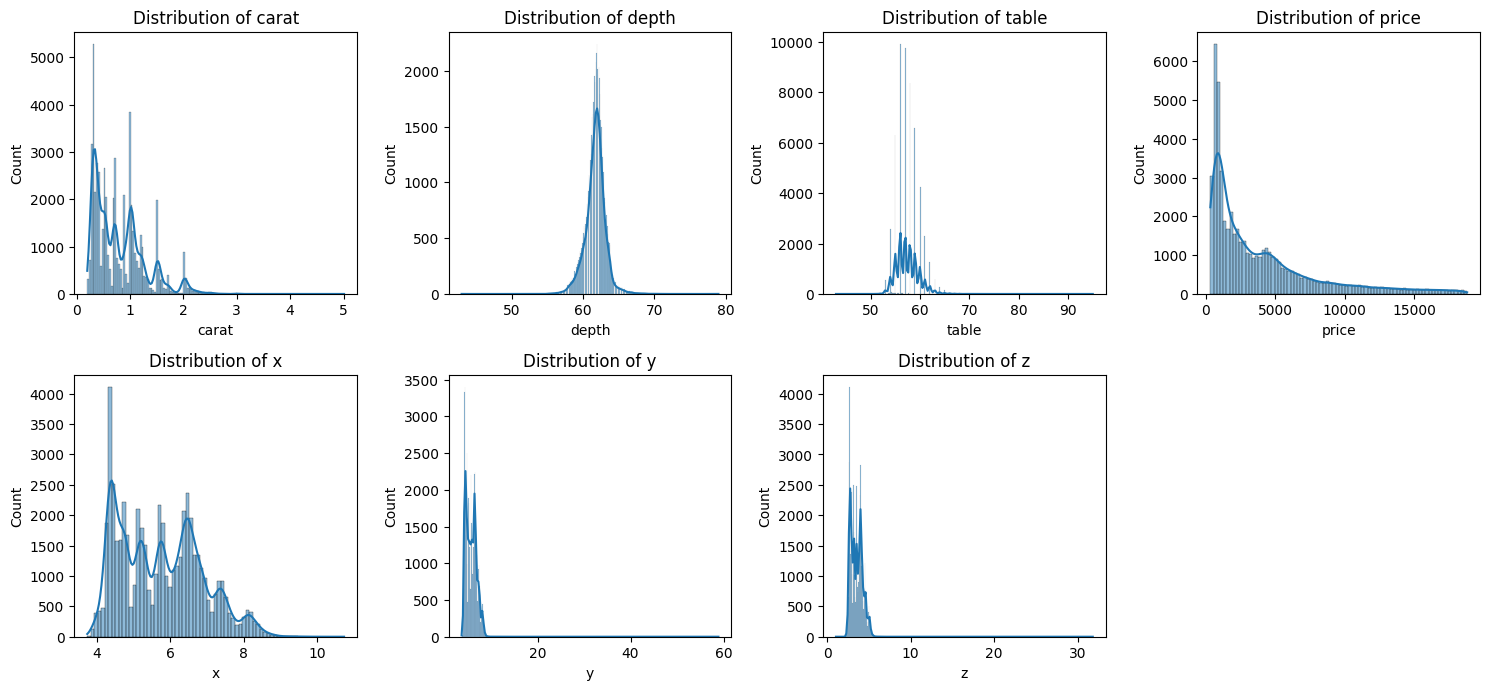

In [ ]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Create subplot grid for distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
  plt.subplot(3, 4, i)
  sns.histplot(data[col], kde=True)
  plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

###b. Distribution of Traget variable (Price)

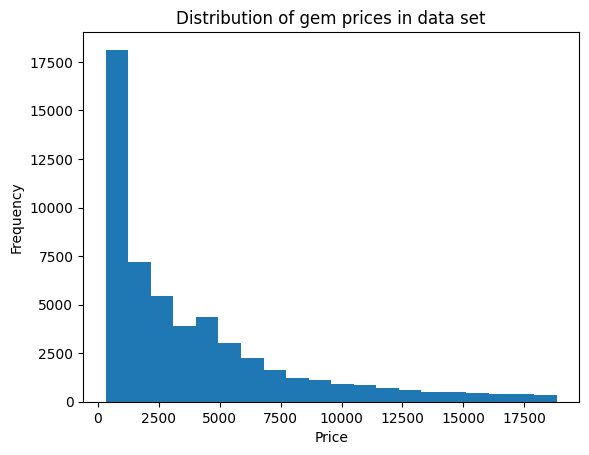

In [ ]:
plt.hist(data['price'], bins=20)
plt.title('Distribution of gem prices in data set')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
figure = px.scatter(data_frame = data, x="carat",
                    y="price",
                    color= "cut", trendline="ols")
figure.show()

In [ ]:
fig = px.box(data, x="cut",
             y="price",
             color="color")
fig.show()

In [ ]:
figure = px.box(data_frame = data, x="clarity",
                    y="price", color= "cut")
figure.show()

###Correlation Matrix

In [ ]:
numerical_data = data.select_dtypes(include=[np.number]) #Taking numerical variables to get correlation between the variables
correlation_matrix = numerical_data.corr() #Creating the coreelation matrix
correlation_matrix

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


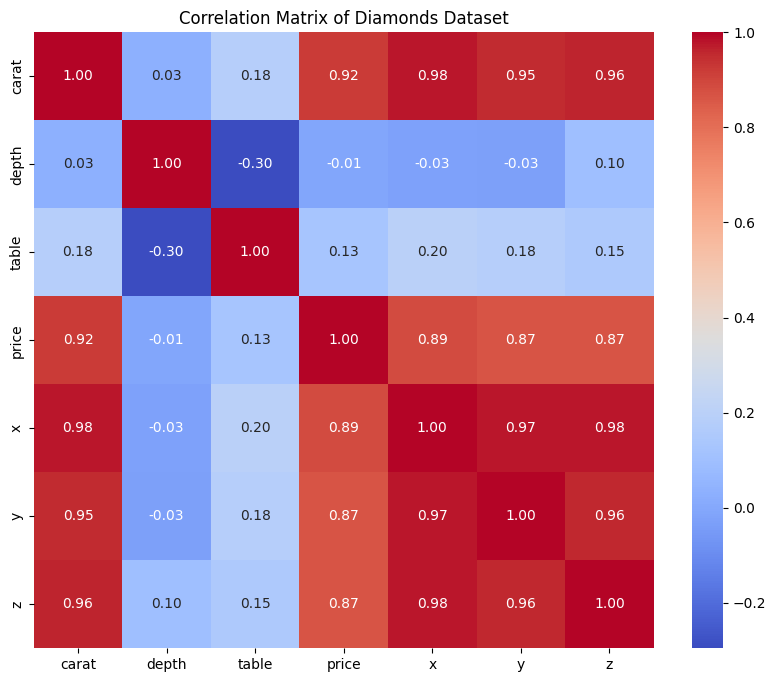

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Diamonds Dataset')
plt.show()



```
# This is formatted as code
```

###One-hot encoding Categorical variables (Cut, Clarity and Color) into numerical values

In [ ]:
cut_mapping={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
data['cut'] = data['cut'].map(cut_mapping)

clarity_mapping={"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
data['clarity'] = data['clarity'].map(clarity_mapping)

color_mapping={"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}
data['color'] = data['color'].map(color_mapping)

<ipython-input-19-ddee2c1f93a7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-ddee2c1f93a7>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-ddee2c1f93a7>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###Multiplying X(length), Y(Width) and Z(Height) into a single column as Size

In [ ]:
data['size'] = data['x'] * data['y'] * data['z']

<ipython-input-20-e3bf297220da>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data = data.drop(columns=['depth', 'table']) #Removing Depth and table columns as they are negatively correlated with predictor.

data.head()

,carat,cut,color,clarity,price,x,y,z,size
0,0.23,5,2,2,326,3.95,3.98,2.43,38.202030
1,0.21,4,2,3,326,3.89,3.84,2.31,34.505856
2,0.23,2,2,5,327,4.05,4.07,2.31,38.076885
3,0.29,4,6,4,334,4.20,4.23,2.63,46.724580
4,0.31,2,7,2,335,4.34,4.35,2.75,51.917250


#Model Building and Evaluation

##Data Splitting

In [ ]:
#Seperating features and target variable
X = data.drop(['price'], axis=1)
y = data['price']

#Splitting data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,  #25% test data
                                                    random_state=42) #Reproducibility

##Linear Regression

In [ ]:
#Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression = R2: {r2_lr}, RMSE: {rmse_lr}")

Linear Regression = R2: 0.9116709320219231, RMSE: 1178.8947899332043


##Decision Tree

In [ ]:
# Decision Tree
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print(f"Decision Tree = R2: {r2_dt}, RMSE: {rmse_dt}")

Decision Tree = R2: 0.9650580211812275, RMSE: 741.4757849768077


##KNN

In [ ]:
# KNN
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print(f"KNN = R2: {r2_knn}, RMSE: {rmse_knn}")

KNN = R2: 0.9674099402418553, RMSE: 716.0870219007729


##XG Boost

In [ ]:
# XGBoost
model_xgb = GradientBoostingRegressor(random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print(f"XGBoost = R2: {r2_xgb}, RMSE: {rmse_xgb}")

XGBoost = R2: 0.9755015340040849, RMSE: 620.8585553895854


##LightGBM

In [ ]:
#LightGBM model
model_lgb = lgb.LGBMRegressor(random_state=42)
model_lgb.fit(X_train, y_train)
y_pred_lgb = model_lgb.predict(X_test)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)

print(f"LightGBM = R2: {r2_lgb}, RMSE: {rmse_lgb}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1282
[LightGBM] [Info] Number of data points in the train set: 40440, number of used features: 8
[LightGBM] [Info] Start training from score 3935.091766
LightGBM = R2: 0.9818397233049444, RMSE: 534.5452257557868


##Random Forest

In [ ]:
# Random Forest
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest = R2: {r2_rf}, RMSE: {rmse_rf}")

Random Forest = R2: 0.9809726647384792, RMSE: 547.1573149195846


#Results

In [ ]:
#Store model performance results
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'KNN', 'XGBoost', 'LightGBM', 'Random Forest'],
    'R2': [r2_lr, r2_dt, r2_knn, r2_xgb, r2_lgb, r2_rf],
    'RMSE': [rmse_lr, rmse_dt, rmse_knn, rmse_xgb, rmse_lgb, rmse_rf]
}

results_df = pd.DataFrame(results)
results_df

,Model,R2,RMSE
0,Linear Regression,0.911671,1178.894790
1,Decision Tree,0.965058,741.475785
2,KNN,0.967410,716.087022
3,XGBoost,0.975502,620.858555
4,LightGBM,0.981840,534.545226
5,Random Forest,0.980973,547.157315
